# Importar data

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, plot_confusion_matrix,f1_score, precision_score,classification_report

df = pd.read_csv("speedDating_trab.csv")
del df['Unnamed: 0'] #'Unnamed: 0' serve de indice para a df

# Analisar as Variavéis

In [287]:
# Que células têm elementos NaN
df.isnull().any()

id           True
partner     False
age          True
age_o        True
goal         True
date         True
go_out       True
int_corr     True
length       True
met          True
like         True
prob         True
match       False
dtype: bool

In [288]:
# Quantidade de elementos NaN
percent_missing = df.isnull().sum() * 100 / len(df)
sum_missing = df.isnull().sum()
missing_value_df = pd.DataFrame({'Qtd elem NaN':sum_missing,'% de elem NaN': percent_missing})
print(missing_value_df)

          Qtd elem NaN  % de elem NaN
id                   1       0.011936
partner              0       0.000000
age                 95       1.133922
age_o              104       1.241346
goal                79       0.942946
date                97       1.157794
go_out              79       0.942946
int_corr           158       1.885892
length             915      10.921461
met                375       4.476009
like               240       2.864646
prob               309       3.688231
match                0       0.000000


In [289]:
# Média, moda, medaiana e desvio padrão
mmmd_df = pd.DataFrame({'Média':df.mean(),'Mediana':df.median(),'Desvio padrão':df.std()})
print(mmmd_df)

              Média  Mediana  Desvio padrão
id         8.960248     8.00       5.491329
partner    8.963595     8.00       5.491068
age       26.358928    26.00       3.566763
age_o     26.364999    26.00       3.563648
goal       2.122063     2.00       1.407181
date       5.006762     5.00       1.444531
go_out     2.158091     2.00       1.105246
int_corr   0.196010     0.21       0.303539
length     1.843495     1.00       0.975662
met        0.494315     0.00       0.499999
like       6.134087     6.00       1.841285
prob       5.207523     5.00       2.129565
match      0.164717     0.00       0.370947


# Processamento de dados

In [290]:
#id null não podemos mudar nada
df = df[df['id'].notna()]

#Retirar todos os NaN excepto em length
df.dropna(subset = ['partner','age','age_o','goal','date','go_out','int_corr','met','prob','like','match'])

,id,partner,age,age_o,goal,date,go_out,int_corr,length,met,like,prob,match
0,1.0,1,21.0,27.0,2.0,7.0,1.0,0.14,2.0,1.0,7.0,6.0,0
1,1.0,2,21.0,22.0,2.0,7.0,1.0,0.54,2.0,1.0,7.0,5.0,0
3,1.0,4,21.0,23.0,2.0,7.0,1.0,0.61,2.0,1.0,7.0,6.0,1
4,1.0,5,21.0,24.0,2.0,7.0,1.0,0.21,2.0,1.0,6.0,6.0,1
5,1.0,6,21.0,25.0,2.0,7.0,1.0,0.25,2.0,1.0,6.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,22.0,17,25.0,24.0,1.0,2.0,1.0,0.28,1.0,0.0,4.0,4.0,0
8373,22.0,18,25.0,26.0,1.0,2.0,1.0,0.64,1.0,0.0,2.0,5.0,0
8374,22.0,19,25.0,24.0,1.0,2.0,1.0,0.71,1.0,0.0,4.0,4.0,0
8375,22.0,20,25.0,29.0,1.0,2.0,1.0,-0.46,1.0,0.0,6.0,5.0,0


In [291]:
# Criar vários modelos com diferentes métricas a imputar em elementos NaN de length
df_mean = df.fillna(df.mean())
df_med = df.fillna(df.median())
df_normal = df.dropna()

#Label
X = df_normal.drop('match', axis = 1).values
X_mean = df_mean.drop('match', axis = 1).values
X_med = df_med.drop('match',axis = 1).values

#Features
y = df_normal['match'].values
y_mean = df_mean['match'].values
y_med = df_med['match'].values

text = ['Sem NaN','Média','Mediana']
X_list = [X,X_mean,X_med]
y_list = [y,y_mean,y_med]

#Testes com os algoritmos base

print("")
print("GAUSSIAN-NB")
for i, j,k in zip(text,X_list,y_list):
    X_train, X_test, y_train, y_test = train_test_split(j, k, test_size=0.1, random_state=0)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    total = X_test.shape[0]
    miss = (y_test != y_pred).sum()
    print(i,"-> Number of mislabeled points out of a total %d points : %d ~ %d%%" % (total,miss,((miss/total)*100)))
print("")
print("CART")
for i, j,k in zip(text,X_list,y_list):
    X_train, X_test, y_train, y_test = train_test_split(j, k, test_size=0.1, random_state=0)
    clf = DecisionTreeClassifier(random_state = 0)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    total = X_test.shape[0]
    miss = (y_test != y_pred).sum()
    print(i,"-> Number of mislabeled points out of a total %d points : %d ~ %d%%" % (total,miss,((miss/total)*100)))


GAUSSIAN-NB
Sem NaN -> Number of mislabeled points out of a total 688 points : 116 ~ 16%
Média -> Number of mislabeled points out of a total 838 points : 149 ~ 17%
Mediana -> Number of mislabeled points out of a total 838 points : 153 ~ 18%

CART
Sem NaN -> Number of mislabeled points out of a total 688 points : 149 ~ 21%
Média -> Number of mislabeled points out of a total 838 points : 200 ~ 23%
Mediana -> Number of mislabeled points out of a total 838 points : 198 ~ 23%


# Expriências e resultados

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1130
           1       0.48      0.26      0.33       246

    accuracy                           0.82      1376
   macro avg       0.67      0.60      0.61      1376
weighted avg       0.79      0.82      0.79      1376

Accuracy: 81%


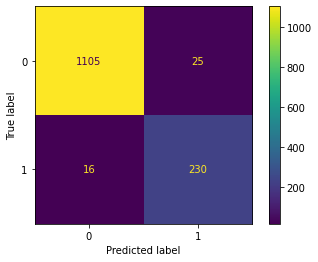

In [292]:
X = df_normal.drop('match', axis = 1).values
y = df_normal['match'].values

#Primeira abordagem
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
#print("Accuracy:",accuracy_score(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test)
results_nm = confusion_matrix(y_test,y_pred)
#print(results_nm)
print(classification_report(y_test,y_pred))
print("Accuracy: %d%%"% (accuracy_score(y_test,y_pred)*100))

              precision    recall  f1-score   support

           0       0.86      0.94      0.89      1140
           1       0.44      0.24      0.31       236

    accuracy                           0.82      1376
   macro avg       0.65      0.59      0.60      1376
weighted avg       0.79      0.82      0.79      1376

Accuracy: 81%


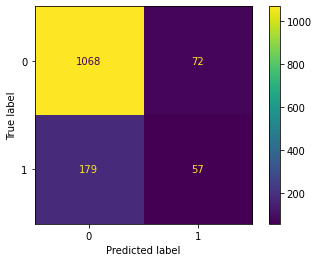

In [298]:
#Fazer shuffle aos dados
df_shuffle = df_normal.sample(frac = 1)


X = df_shuffle.drop('match', axis = 1).values
y = df_shuffle['match'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
#print("Accuracy:",accuracy_score(y_test, y_pred))
plot_confusion_matrix(gnb, X_test, y_test)
print(classification_report(y_test,y_pred))
print("Accuracy: %d%%"% (accuracy_score(y_test,y_pred)*100))

In [327]:
#Alterar alguns parametros
df_shuffle = df_normal.sample(frac = 1)


X = df_shuffle.drop('match', axis = 1).values
y = df_shuffle['match'].values

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1156
           1       0.67      0.05      0.10       220

    accuracy                           0.84      1376
   macro avg       0.76      0.52      0.51      1376
weighted avg       0.82      0.84      0.78      1376

Accuracy: 84%


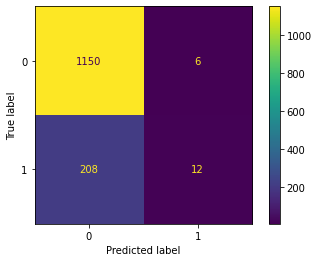

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
gnb = GaussianNB(var_smoothing=0.1)
y_pred = gnb.fit(X_train, y_train).predict(X_test)
plot_confusion_matrix(gnb, X_test, y_test)
print(classification_report(y_test,y_pred))
print("Accuracy: %d%%"% (accuracy_score(y_test,y_pred)*100))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1156
           1       0.45      0.28      0.34       220

    accuracy                           0.83      1376
   macro avg       0.66      0.61      0.62      1376
weighted avg       0.80      0.83      0.81      1376

Accuracy: 83%


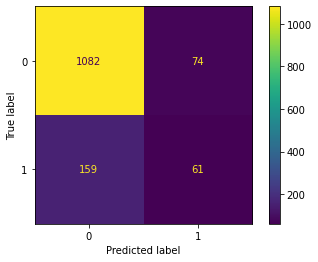

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
gnb = GaussianNB(var_smoothing=1e-60)
y_pred = gnb.fit(X_train, y_train).predict(X_test)
plot_confusion_matrix(gnb, X_test, y_test)
print(classification_report(y_test,y_pred))
print("Accuracy: %d%%"% (accuracy_score(y_test,y_pred)*100))